Let us create a catalogue of events from the IRIS catalogue, for a set time window, area, and minimum magnitude

In [4]:
from obspy.core.event import read_events # obspy event class has a method to read events from a catalogue
from obspy import UTCDateTime # obspy class to handle time 
from obspy.clients.fdsn import Client # object that sets up an FDSN client
# for interactive inline plotting in jupyter:
%matplotlib notebook 


First we create a client object. IRIS provides one via FDSN, but GeoNet does not, at the moment of writing:

In [5]:
irisclient=Client("IRIS") 

Define a start and an endtime. UTCDateTime is a functionality to deal with "time" as a float:

In [6]:
starttime =UTCDateTime("2008-01-01T00:00:00")
endtime= UTCDateTime("2016-10-31T00:00:00")

Define other search criteria (lat, lon of the search box, and a minimum magnitude of the events):

In [7]:
minlat=-50
maxlat=-35
minlon=160
maxlon=180
minmag=5.5

Create a catalogue object that contains all events that match our criteria:

In [8]:
events = irisclient.get_events(minlatitude=minlat,maxlatitude=maxlat,minlongitude=minlon,maxlongitude=maxlon,starttime=starttime, endtime=endtime,mindepth=50,minmagnitude=minmag)

Write your catalogue to an xml file. For earthquakes, this type of xml is called quakeml:

In [9]:
events.write('events.xml',format="QUAKEML")

The catalogue object has a public method called "plot" 
(If this creates two plots for you too, I don't understand that. Seems like a bug to me!)

<IPython.core.display.Javascript object>


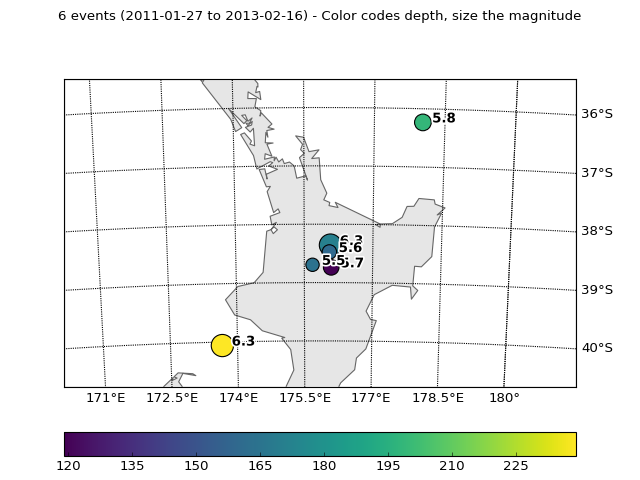

In [10]:
events.plot(projection='local'); # the semi-colon is only necessary in jupyter, as it is a quirk about jupyter plotting